# 03 - Forecasting baseline

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import energy_forecast
from energy_forecast.utils import repo_root
from energy_forecast.preprocessing import load_and_prepare_x, load_and_prepare_y
from energy_forecast.forecasting import Model

import pandas as pd
import numpy as np
from pathlib import Path

# import matplotlib.pyplot as plt
# import seaborn as sns
import mlflow
import os
from sktime.transformations.series.detrend import STLTransformer
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.sarimax import SARIMAX
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.fbprophet import Prophet
from sktime.utils.plotting import plot_series

os.environ["MLFLOW_TRACKING_URI"] = "/workspaces/energy_forecast/mlruns"

In [3]:
REPO_ROOT = Path(repo_root())
DATA_PROCESSED = REPO_ROOT / "data" / "processed"
MODEL_DIR = REPO_ROOT / "models"

TRAIN_PATH = DATA_PROCESSED / "train.csv"
TEST_PATH = DATA_PROCESSED / "test.csv"

In [4]:
# x_train = load_and_prepare_x(TRAIN_PATH)
y_train = load_and_prepare_y(TRAIN_PATH)
y_test = load_and_prepare_y(TEST_PATH)

# print(f'{x_train.shape=}, cols={x_train.columns.tolist()}')
print(f"{y_train.shape=}, cols={y_train.columns.tolist()}")
print(f"{y_test.shape=}, cols={y_test.columns.tolist()}")

y_train.shape=(193, 1), cols=['total_energy']
y_test.shape=(65, 1), cols=['total_energy']


# Forecasting (Univariate)

## Baseline models
Train a few baseline models

### Naive

"naive" -> score=0.379


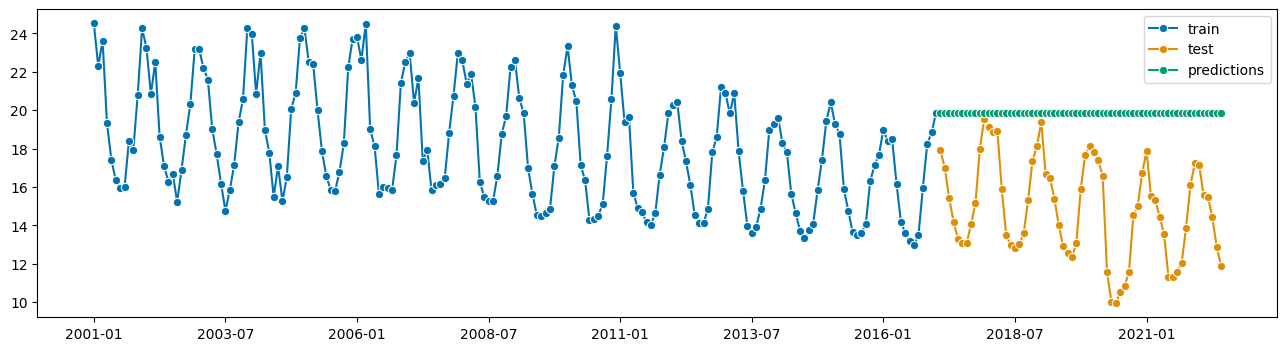

In [169]:
estimator = NaiveForecaster(strategy="last", sp=1)
model = Model(estimator, "naive")

# We pass this as an input to our
model.fit_and_evaluate(
    y_train=y_train,
    y_test=y_test,
    exp_name="baseline",
)
print(f'"{model.name}" -> score={model.score:.3f}')
model.save(MODEL_DIR / model.name)

### Naive seasonal

"naive_seasonal" -> score=0.098


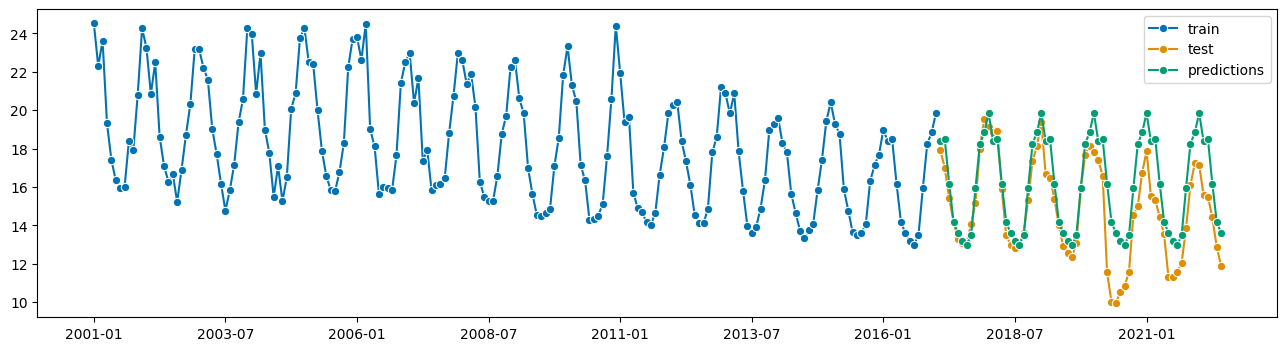

In [171]:
estimator = NaiveForecaster(strategy="last", sp=12)
model = Model(estimator, "naive_seasonal")

# We pass this as an input to our
model.fit_and_evaluate(
    y_train=y_train,
    y_test=y_test,
    exp_name="naive",
)
print(f'"{model.name}" -> score={model.score:.3f}')
model.save(MODEL_DIR / model.name)

### Naive seasonal + drift strategy

"naive_seasonal_drift" -> score=0.321


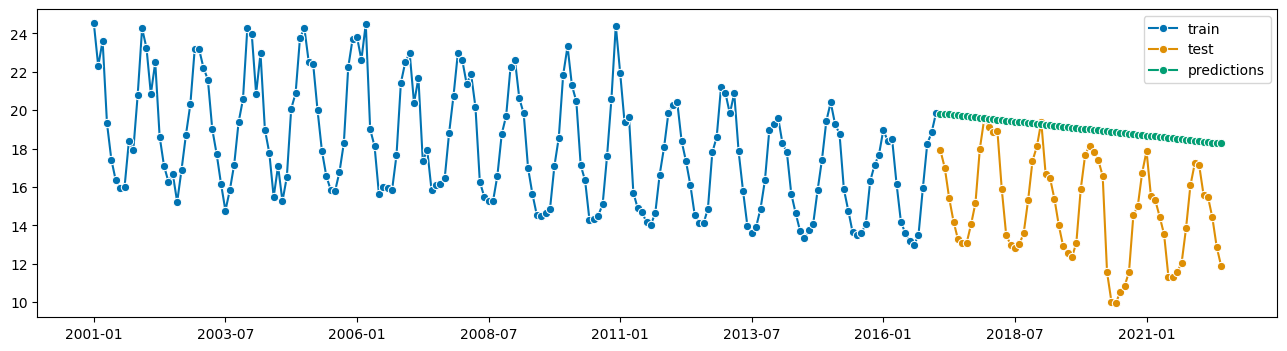

In [170]:
estimator = NaiveForecaster(strategy="drift", sp=12)
model = Model(estimator, "naive_seasonal_drift")

# We pass this as an input to our
model.fit_and_evaluate(
    y_train=y_train,
    y_test=y_test,
    exp_name="naive",
)
print(f'"{model.name}" -> score={model.score:.3f}')
model.save(MODEL_DIR / model.name)

## More sophisticated models - Classic

### AutoARIMExponentialSmoothing

"autoarima" -> score=0.051


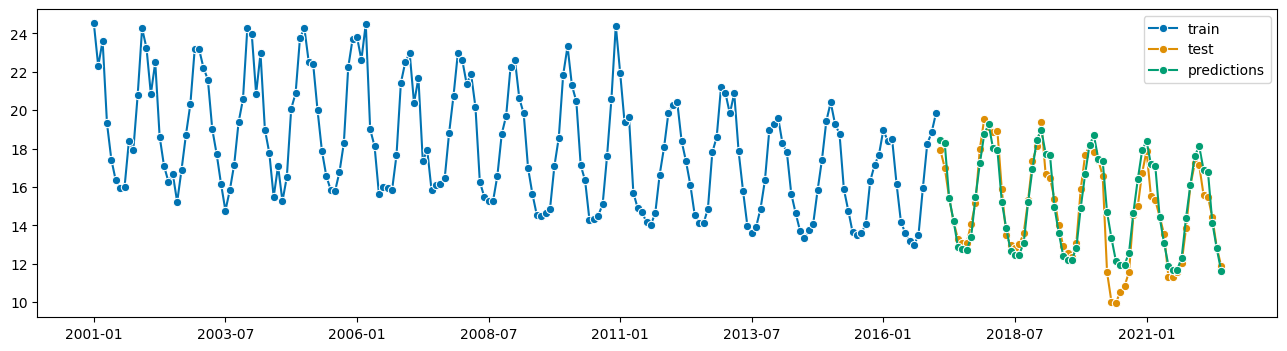

In [27]:
estimator = AutoARIMA(sp=12)
model = Model(estimator, "autoarima")

# We pass this as an input to our
model.fit_and_evaluate(
    y_train=y_train,
    y_test=y_test,
    exp_name="classic",
)
print(f'"{model.name}" -> score={model.score:.3f}')
model.save(MODEL_DIR / model.name)

### SARIMAX
With a bit of crude parameter tuning

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23466D+00    |proj g|=  2.73437D-01

At iterate    5    f=  1.20124D+00    |proj g|=  7.22202D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   3.948D-06   1.201D+00
  F =   1.2012195913083841     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
"sarimax" -> score=0.055


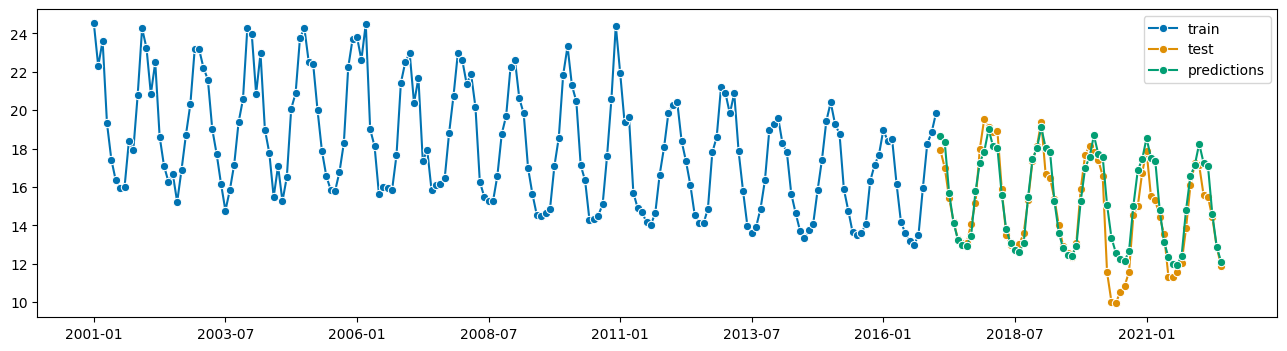

In [28]:
estimator = SARIMAX(seasonal_order=(1, 1, 0, 12))
model = Model(estimator, "sarimax")

# We pass this as an input to our
model.fit_and_evaluate(
    y_train=y_train,
    y_test=y_test,
    exp_name="classic",
)
print(f'"{model.name}" -> score={model.score:.3f}')
model.save(MODEL_DIR / model.name)

### Exp smoothing

"exp_smoothing" -> score=0.057


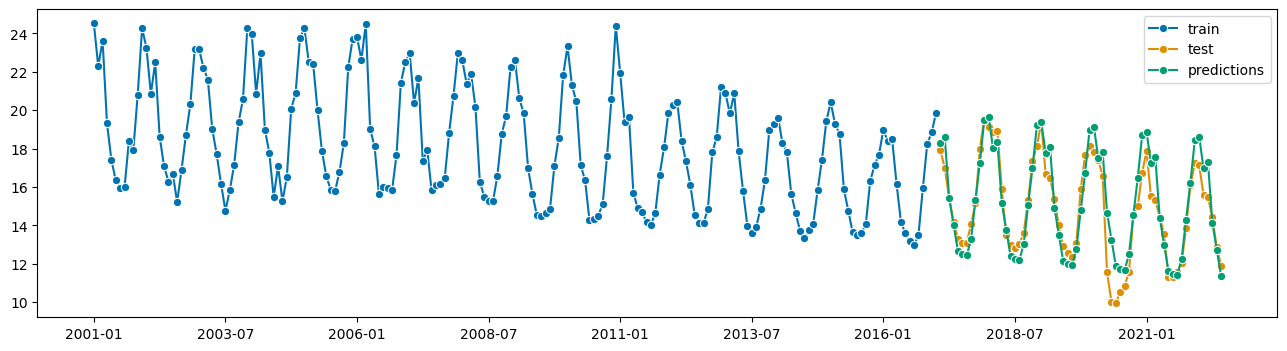

In [34]:
estimator = ExponentialSmoothing(sp=12, seasonal="add", trend="add")
model = Model(estimator, "exp_smoothing")

# We pass this as an input to our
model.fit_and_evaluate(
    y_train=y_train,
    y_test=y_test,
    exp_name="classic",
)
print(f'"{model.name}" -> score={model.score:.3f}')
model.save(MODEL_DIR / model.name)

## Other advanced models

### FB Prophet

"prophet" -> score=0.059


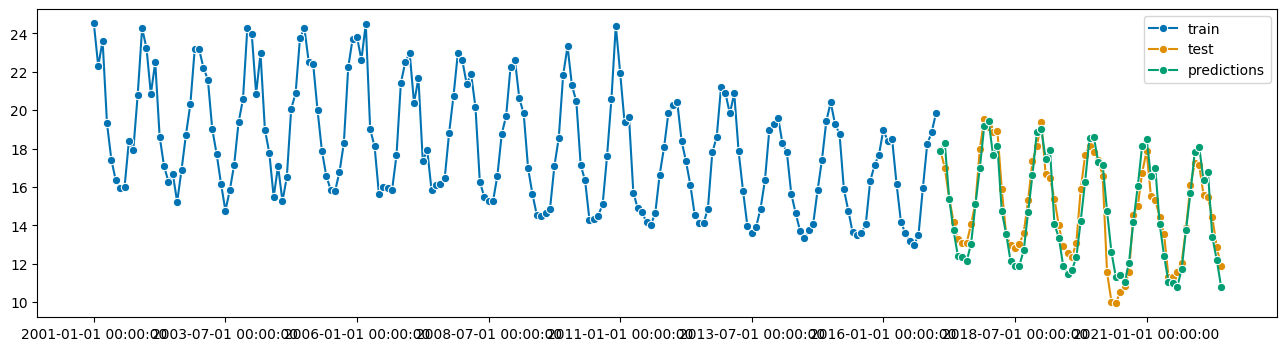

In [26]:
estimator = Prophet(yearly_seasonality=True)
model = Model(estimator, "prophet")

# We pass this as an input to our
model.fit_and_evaluate(
    y_train=y_train,
    y_test=y_test,
    exp_name="other_advanced",
)
print(f'"{model.name}" -> score={model.score:.3f}')
model.save(MODEL_DIR / model.name)